<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/k_Means_with_a_randomly_generated_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelando com o k-Means para dados gerados aleatoriamente**

O algoritmo k-Means é um método amplamente utilizado em aprendizado de máquina não supervisionado, servindo para agrupar dados em clusters distintos com base na similaridade entre os pontos de dados.

## **Definição do k-Means**

Em outras palavras, k-Means é um algoritmo de particionamento que divide um conjunto de dados em k clusters não sobrepostos, em que os objetos dentro de um cluster são muito semelhantes e entre clusters diferentes são bastante distintos ou dissimilares.

O algoritmo trabalha iterativamente de modo a **minimizar** as distâncias intra-cluster (pontos mais próximos de seus respectivos centróides) e **maximizar** as distâncias inter-cluster (pontos mais distantes de centróides de outros clusters).

Matematicamente, o objetivo do algoritmo k-Means é minimizar o SSE (_Sum of Squared Errors_), usado para medir o erro total dentro dos clusters, o que significa que os pontos estão mais próximos de seus respectivos centróides.

## **Funcionamento do k-Means**

O K-Means segue um processo iterativo para encontrar os clusters:

1. **Inicialização dos centróides**: Define-se o número de clusters desejado (k) e escolhem-se aleatoriamente k pontos como centróides iniciais. Esses pontos atuam como os centróides iniciais para os clusters.

2. **Atribuição**: Calcula-se a distância de cada ponto de dado a cada centróide. Cada ponto é atribuído ao cluster cujo centróide está mais próximo.

  Para cada ponto no conjunto de dados, calcula-se a distância para cada centróide usando uma métrica de similaridade, geralmente usando a **Distância Euclidiana** ([clique aqui para saber mais](https://github.com/SampMark/Computational-Thinking/blob/main/Minkowski_Manhattan_and_Euclidean_distance_metrics.ipynb)):

  $$ d(x_1, x_2) = \sqrt{\sum_{i=1}^n (x_{1i} - x_{2i})^2} $$

  Onde:

  * $ d(x_1, x_2) $: Representa a função de distância 𝑑 entre os vetores 𝑥1 e 𝑥2.

  * $ \sqrt{\sum_{i=1}^n (x_{1i} - x_{2i})^2} $: Representa a raiz quadrada do somatório do quadrado da diferença, $ (x_{1i} - x_{2i})^2 $, entre os elementos correspondentes de 𝑥1 e 𝑥2, onde 𝑖 varia de 1 até 𝑛.

  Neste caso:

  $$ d(p_i, C_j) = \sqrt{\sum_{k=1}^m (x_{i,k} - c_{j,k})^2} $$

3. **Atualização**: Calcula-se a média das posições dos pontos de dados em cada cluster. Essa média se torna a nova posição do centróide do cluster.
  A partir do recálculo dos centróides, atualiza-se a posição de cada centróide como a média dos pontos atribuídos ao cluster: $$ C_j = \frac{1}{n} \sum_{i=1}^n x_i $$

4. **Reatribuição e repetição**: Com os novos centróides, repete-se os passos de atribuição e atualização a cada iteração, isto é, repete-se o cálculo das distâncias e reatribuição dos pontos até que os centróides não mudem mais ou o critério de convergência seja atingido.

## **Métricas de Distância e Similaridade**
A métrica de distância utilizada impacta diretamente na formação dos clusters,as mais comuns são:
* **Distância Euclidiana**: Ideal para dados contínuos.
* **Distância Manhattan**: Menos sensível a outliers.
* **Distância Cosseno**: Boa para dados esparsos ou vetores de texto.

É essencial normalizar os dados antes de aplicar k-Means para evitar que características com escalas diferentes dominem o agrupamento.

## **Instalando as bibliotecas necessárias**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## **Gerando dados aleatórios**

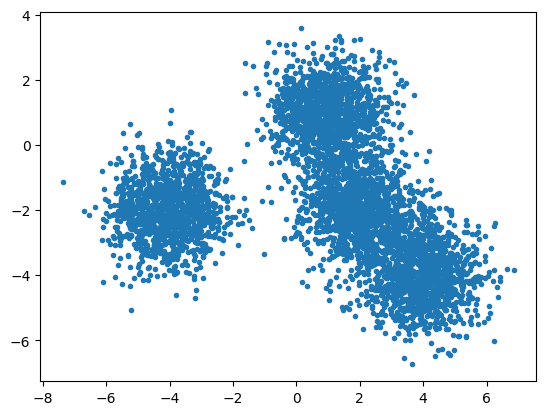

In [2]:
# Define a semente do gerador de números aleatórios para reprodutibilidade
np.random.seed(0)

# Gera dados sintéticos para clustering
#   n_samples: número total de amostras (5000)
#   centers: coordenadas dos centros dos clusters
#   cluster_std: desvio padrão dos clusters (controla a dispersão dos pontos)
X, y = make_blobs(
    n_samples=5000,
    centers=[[4, -4], [-4, -2], [2, -2], [1, 1]],
    # centers=[[4, 4], [-2, -1], [2, -3], [1, 1]],
    cluster_std=0.9
)

# Plota os dados gerados
#   X[:, 0]: seleciona a primeira coluna de X (coordenada x)
#   X[:, 1]: seleciona a segunda coluna de X (coordenada y)
#   marker='.': define o marcador como um ponto
plt.scatter(X[:, 0], X[:, 1], marker='.')

# Exibe o gráfico
plt.show()

In [6]:
# Normalização dos dados (útil para dados reais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Modelando o k-Means para `k = 3`**

---

O construtor da classe `KMeans()` do Scikit-learn implementa o algoritmo K-Means. O método de inicialização dos centróides é especificado por `init="k-means++"`, essa opção selecionará os centróides iniciais distantes entre si, melhorando a convergência do algoritmo e a qualidade dos clusters.

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('k_means3', KMeans(
            init="k-means++", # Método de inicialização dos centróides
            n_clusters=3,     # Número de clusters escolhido
            n_init=12,        # Número de vezes que o algoritmo será executado com diferentes inicializações
            random_state=0    # Define a semente aleatória para reprodutibilidade (opcional)
    ))
])
pipeline.fit(X)
k_means3 = pipeline['k_means3']

In [15]:
# Obtém os rótulos de cluster atribuídos a cada ponto de dado
k_means_labels = k_means3.labels_

# Apresenta os rótulos
k_means_labels

array([2, 0, 0, ..., 0, 2, 2], dtype=int32)

In [16]:
# Obtém as coordenadas dos centróides dos clusters
k_means_cluster_centers = k_means3.cluster_centers_

# Apresenta as coordenadas dos centróides
k_means_cluster_centers

array([[ 0.79045874, -0.778686  ],
       [ 0.1263057 ,  1.1920015 ],
       [-1.54090833, -0.11811071]])

In [17]:
# Cálculo do SSE usando NumPy para maior eficiência
sse3 = np.sum((X - k_means_cluster_centers[k_means_labels]) ** 2)

print(f"SSE para k = 3: {sse3}")

SSE para k = 3: 2075.339896287723


SSE para 'k = 3': 2075.339896287723


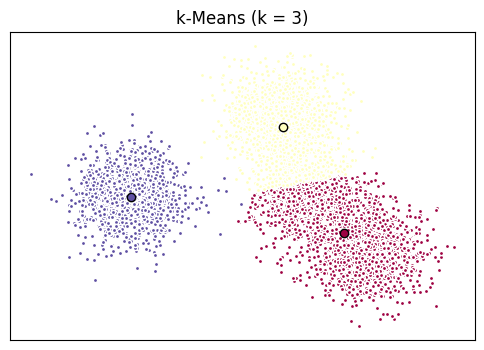

In [18]:
# Inicializa o gráfico com as dimensões especificadas.
fig = plt.figure(figsize=(6, 4))

# Colors usa um mapa de cores, que produzirá uma matriz de cores com base
# no número de rótulos que existem. Será utilizado set(k_means_labels) para
# se obter os rótulos exclusivos.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))

# Cria o gráfico
ax = fig.add_subplot(1, 1, 1)

# O loop que plotará os pontos de dados e centroides.
# k variará de 0 a 3, o que corresponderá aos possíveis clusters para cada ponto de dados agrupado.
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):

    # Crie uma lista de todos os pontos de dados, onde os pontos de dados que estão no cluster (ex. cluster 0)
    # serão rotulados como verdadeiros, caso contrário, rotule-os como falsos.
    my_members = (k_means3.labels_ == k)

    # Defina o centróide ou centro do cluster.
    cluster_center = k_means3.cluster_centers_[k]

    # Plota os pontos de dados com cor col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plota os centróides com a cor especificada, mas com um contorno mais escuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Configura o gráfico
ax.set_title('k-Means (k = 3)')
ax.set_xticks(())  # Remove as marcas do eixo x
ax.set_yticks(())  # Remove as marcas do eixo y

# Exibe o gráfico
print(f"SSE para 'k = 3': {sse3}")
plt.show()

## **Modelando o k-Means para `k = 4`**

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('k_means', KMeans(
            init="k-means++", # Método de inicialização dos centróides
            n_clusters=4,     # Número de clusters escolhido
            n_init=12,        # Número de vezes que o algoritmo será executado com diferentes inicializações
            random_state=0    # Define a semente aleatória para reprodutibilidade (opcional)
    ))
])
pipeline.fit(X)
k_means = pipeline['k_means']

In [22]:
# Obtém os rótulos de cluster atribuídos a cada ponto de dado
k_means_labels = k_means.labels_

# Apresenta os rótulos
k_means_labels

array([3, 1, 1, ..., 0, 3, 3], dtype=int32)

In [58]:
# Obtém as coordenadas dos centróides dos clusters
k_means_cluster_centers = k_means.cluster_centers_

# Apresenta as coordenadas dos centróides
k_means_cluster_centers

array([[ 0.33213   , -1.18975236],
       [-0.11678766,  0.26852638],
       [-1.3963692 , -0.45005137],
       [ 1.17135307,  1.36920518]])

In [25]:
# Recalculate cluster centers with the correct number of clusters (k=4)
k_means_cluster_centers = k_means.cluster_centers_

# Cálculo do SSE using NumPy for k=4
sse4 = np.sum((X - k_means_cluster_centers[k_means_labels]) ** 2)

print(f"SSE para k = 4: {sse4}")

SSE para k = 4: 1265.3139836671246


SSE para 'k = 4': 1265.3139836671246


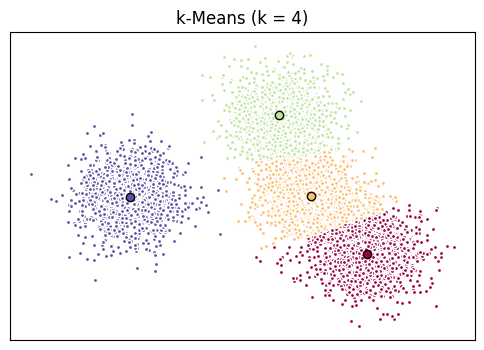

In [27]:
# Inicializa o gráfico com as dimensões especificadas.
fig = plt.figure(figsize=(6, 4))

# Colors usa um mapa de cores, que produzirá uma matriz de cores com base
# no número de rótulos que existem. Será utilizado set(k_means_labels) para
# se obter os rótulos exclusivos.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))

# Cria o gráfico
ax = fig.add_subplot(1, 1, 1)

# O loop que plotará os pontos de dados e centroides.
# k variará de 0 a 3, o que corresponderá aos possíveis clusters para cada ponto de dados agrupado.
for k, col in zip(range(len(k_means.cluster_centers_)), colors):

    # Crie uma lista de todos os pontos de dados, onde os pontos de dados que estão no cluster (ex. cluster 0)
    # serão rotulados como verdadeiros, caso contrário, rotule-os como falsos.
    my_members = (k_means.labels_ == k)

    # Defina o centróide ou centro do cluster.
    cluster_center = k_means.cluster_centers_[k]

    # Plota os pontos de dados com cor col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plota os centróides com a cor especificada, mas com um contorno mais escuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Configura o gráfico
ax.set_title('k-Means (k = 4)')
ax.set_xticks(())  # Remove as marcas do eixo x
ax.set_yticks(())  # Remove as marcas do eixo y

# Exibe o gráfico
print(f"SSE para 'k = 4': {sse4}")
plt.show()

## **Avaliando a SSE (*Sum of Squared Errors*)**

O SSE (Sum of Squared Errors) foi a métrica utilizada para medir o erro total dentro dos clusters.

$$ SSE = \sum_{i=1}^n (x_i - C_j)^2 $$

Um valor menor de SSE indica que os pontos estão mais próximos de seus respectivos centróides, o que geralmente reflete clusters mais compactos.

**Comparação entre os valores obtidos**

* Para k = 3, o SSE foi 2.075,34.
* Para k = 4, o SSE foi 1.265,31.

Como SSE para k = 4 é menor do que para k = 3, o modelo para 4 clusters parece conseguir agrupar de forma mais eficiente os dados, com os pontos de cada cluster mais próximos de seus centróides, conforme visto visualmente.

## **Implementando o *Elbow Method* para Escolha do k**

---
O valor de k foi definido arbitrariamente, para validar melhor a escolha de k, é interessante implementar o Método do Cotovelo (*Elbow Method*) e o `silhouette_score` para avaliar melhor a escolha.

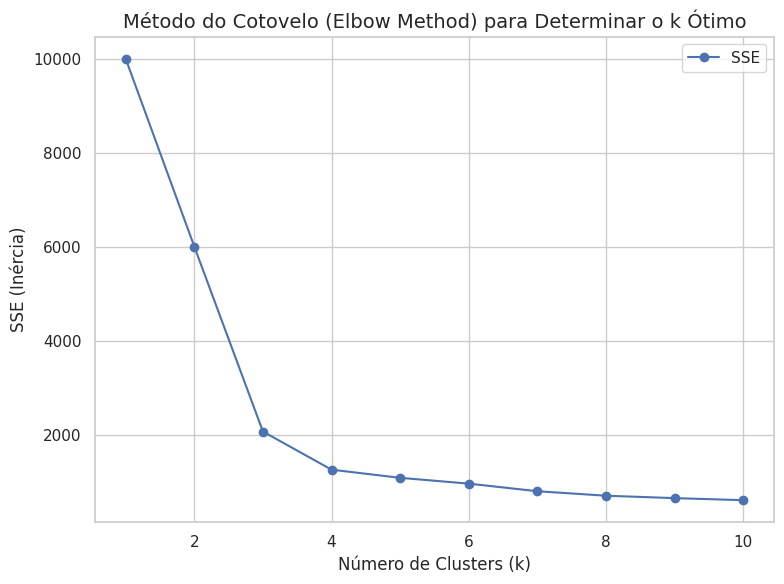

In [34]:
from sklearn.cluster import KMeans

# Cálculo do SSE (Sum of Squared Errors) para diferentes valores de k
sse = {}  # Dicionário para armazenar os valores de SSE
for k in range(1, 11):  # Testar valores de k de 1 a 10
    # Configurando o algoritmo k-means
    kmeans = KMeans(
        n_clusters=k,      # Número de clusters
        init="k-means++",  # Inicialização eficiente dos centróides
        random_state=0     # Garantir reprodutibilidade dos resultados
    )
    kmeans.fit(X)  # Ajusta o modelo aos dados
    sse[k] = kmeans.inertia_  # A inércia representa o SSE para o k atual

# Plota o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(
    list(sse.keys()),     # Eixo x: valores de k
    list(sse.values()),   # Eixo y: valores de SSE
    marker='o',           # Marca os pontos com círculos
    linestyle='-',        # Linhas para conectar os pontos
    label="SSE"           # Legenda da curva
)
plt.xlabel("Número de Clusters (k)", fontsize=12)  # Rótulo do eixo x
plt.ylabel("SSE (Inércia)", fontsize=12)           # Rótulo do eixo y
plt.title("Método do Cotovelo (Elbow Method) para Determinar o k Ótimo", fontsize=14)  # Título
plt.grid(True)  # Adiciona uma grade ao fundo para facilitar a leitura
plt.legend()  # Exibe a legenda
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Mostra o gráfico


## **Coeficiente Silhouette**
O coeficiente silhouette avalia a qualidade de um agrupamento considerando dois critérios:

1. Compactação: quão próximo cada ponto está dos demais pontos em seu próprio cluster.
2. Separação: quão distante cada ponto está dos pontos em outros clusters.
Para um ponto 𝑖, o coeficiente silhouette ($s_i$) é definido como:

$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$

Onde:

* $𝑎_𝑖$: é a distância média entre 𝑖 e todos os outros pontos do mesmo cluster (compactação intra-cluster).
* $𝑏_𝑖$: é a distância média entre 𝑖 e os pontos do cluster mais próximo (separação inter-cluster).


In [28]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=12, random_state=0)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"Para n_clusters = {n_clusters}, o silhouette score é {silhouette_avg}")


Para n_clusters = 2, o silhouette score é 0.45336100190018985
Para n_clusters = 3, o silhouette score é 0.5914828840479484
Para n_clusters = 4, o silhouette score é 0.5515507294191948
Para n_clusters = 5, o silhouette score é 0.4774169705627275
Para n_clusters = 6, o silhouette score é 0.4128795808089962
Para n_clusters = 7, o silhouette score é 0.36777599842746533
Para n_clusters = 8, o silhouette score é 0.3508347002057808
Para n_clusters = 9, o silhouette score é 0.34462601351496785
Para n_clusters = 10, o silhouette score é 0.3471223897400573


## **Avaliando o Silhouette Score**

* 𝑘 = 3: Silhouette Score = 0.591
* 𝑘 = 4: Silhouette Score = 0.552

  O Silhouette Score avalia tanto a compactação intra-cluster quanto a separação inter-cluster. Valores mais altos são melhores, mas a queda de 0.591 para 0.552 ao passar de 𝑘=3 para 𝑘=4 sugere que a qualidade dos clusters diminuiu ligeiramente em termos de separação, apesar de uma melhoria na compactação (refletida pelo SSE).

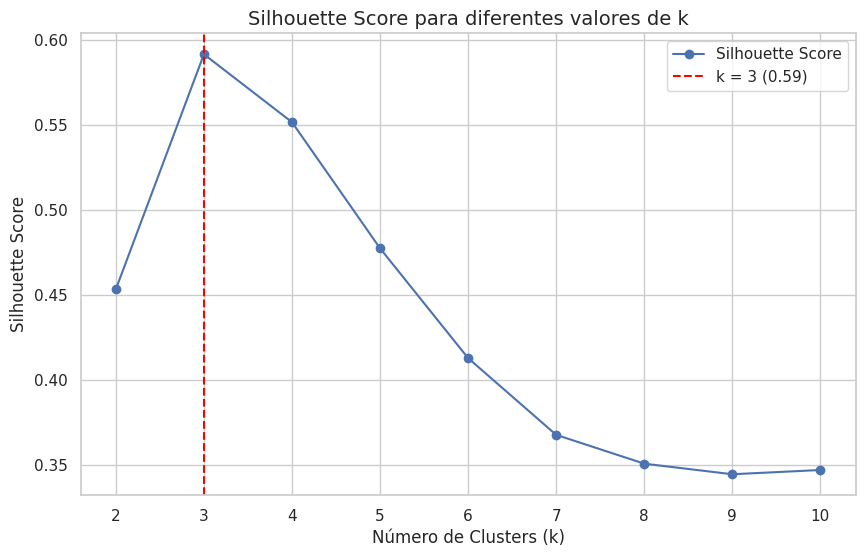

In [30]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Configuração do estilo gráfico
sns.set(style="whitegrid")

# Escalonamento dos dados (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definição do range de clusters
range_n_clusters = range(2, 11)
silhouette_scores = []

# Cálculo do silhouette score para cada k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Melhor número de clusters
best_k = range_n_clusters[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

# Visualização gráfica
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'k = {best_k} ({best_score:.2f})')
plt.xlabel("Número de Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score para diferentes valores de k", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## **Referências**

  GÉRON, Aurélien. _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems_. 3ª ed. Sebastopol: O'Reilly Media, 2023.